<a href="https://colab.research.google.com/drive/1Q1_7MxzTXFi3uNsgazZ0XJnkHOmL8Jea?usp=sharing"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>



<img src='http://grupogamacocom.ipage.com/Imagenes/logoUN1.png' width='200px' margin='100px'></img>

## Universidad Nacional de Colombia - Sede Manizales
### Confiabilidad de sistemas eléctricos
### **Profesor: Juan David Marín Jiménez** 



---



# Objetivos de este Notebook

* Explicar conceptos básicos de probabilidad y estadística aplicada a la Ingeniería Eléctrica
* Aplicar ejercicios básicos de probabilidad y estadística


# Tabla de Contenido

1. [Introducción](#section1)

2. [Definiciones básicas](#section2)

3. [Probabilidad condicional](#section3)

4. [El caso continuo y la distribución normal](#section4)

5. [Medidas de tendencia central y de variabilidad](#section5)

6. [Dos grandes Teoremas](#section6)

7. [Material adicional](#section7)


<a id='section1'></a>
# 1. Introducción

## Definición de probabilidad

La probabilidad es un concepto matemático **muy útil para modelar el mundo**, ya que nos permite cuantificar y formalizar nuestro conocimiento sobre **eventos futuros cuyo resultado es incierto**. Incluso en un mundo físico completamente determinístico, la probabilidad sigue siendo fundamental en nuestra descripción del mismo.

Básicamente, la probabilidad se refiere a la **predicción de la ocurrencia o no ocurrencia de un evento futuro**, como por ejemplo si lloverá o no, o cuál será la temperatura en un momento determinado. Nos preguntamos cuál es la probabilidad de que nuestra observación sea "sí se produjo el evento", "no se produjo el evento" o "el valor de la variable T es 25,1°C".

Nuestro objetivo inicial es comprender el significado de estas probabilidades y cómo se aplican a diferentes situaciones en el mundo real.

## La probabilidad y la estadística

La Teoría de Probabilidades y la Estadística **son disciplinas matemáticas diferentes**, y aunque hay investigadores que se dedican exclusivamente a una u otra, ***desde el punto de vista de la ciencia de datos***, ***LA PRINCIPAL*** aplicación de la Teoría de Probabilidades es la Estadística. La Teoría de Probabilidades se enfoca en establecer un **modelo probabilístico del mundo**, mientras que **la Estadística se basa en los datos para reconstruir el mejor modelo probabilístico posible**. 



En resumen, en la Teoría de Probabilidades asumimos un conocimiento previo exacto sobre las probabilidades, mientras que en Estadística nuestro punto de partida son los datos.

## Ejemplo

Existen diversas maneras de comprender cómo la probabilidad cuantifica nuestra incertidumbre. Para evitar abordar de entrada una cuestión filosófica potencialmente complicada, comencemos por algo que tal vez nos resulte más familiar: una función de Python que genere "números aleatorios", como la función randint de la librería numpy.random.

Utilizando esta función, podemos realizar el experimento de lanzar repetidamente un dado de seis caras y registrar los resultados. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import minimize

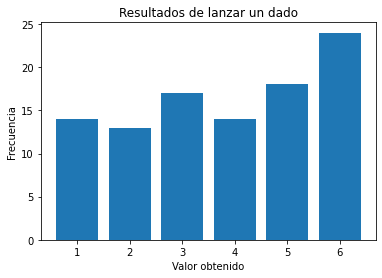

In [ ]:
# Hagamos un experimento! Tiremos un dado 1000 veces.

n_experimentos = 100
resultados = np.random.randint(1, 7, size=n_experimentos)
valores = np.arange(1, 7)
conteos = np.bincount(resultados)[1:]

plt.bar(valores, conteos)
plt.title("Resultados de lanzar un dado")
plt.xlabel("Valor obtenido")
plt.ylabel("Frecuencia")
plt.show()
# Veamos cuántas veces se obtuvo cada cosa con un histograma

 

Vemos que salen más o menos en iguales proporciones, pero no exactamente.

Observemos algunas cosas:
* Cada vez que repetimos las 1000 tiradas, obtenemos algo ligeramente distinto (¡probarlo!). ¿Quiere eso decir que las probabilidades de sacar un cierto número están fluctuando en el tiempo? ¿O siempre es la misma probabilidad, por más que veamos resultados distintos? 
* Si repetimos con muchas más tiradas, vamos a ver que el resultado se hace mucho más consistente:

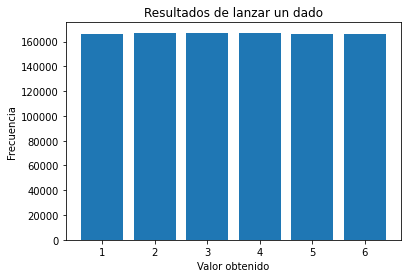

In [ ]:
# Hagamos un experimento! Tiremos un dado 1.000.000 veces.

n_experimentos = 1000000
resultados = np.random.randint(1, 7, size=n_experimentos)
valores = np.arange(1, 7)
conteos = np.bincount(resultados)[1:]

plt.bar(valores, conteos)
plt.title("Resultados de lanzar un dado")
plt.xlabel("Valor obtenido")
plt.ylabel("Frecuencia")
plt.show()
# Veamos cuántas veces se obtuvo cada cosa con un histograma

 

Pero para poder leer mejor esto, nos conviene normalizar el histograma, es decir dividir las alturas de las barras por el número total de experimentos, para obtener la fracción de veces que se obtuvo un cierto resultado.

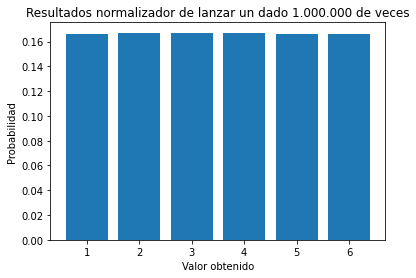

In [ ]:
fracciones = conteos / n_experimentos
plt.bar(valores, fracciones)



plt.title("Resultados normalizador de lanzar un dado 1.000.000 de veces")
plt.xlabel("Valor obtenido")
plt.ylabel("Probabilidad")
plt.show()

Vemos que las fracciones son todas aproximadamente iguales a $0,17$, que es aproximadamente lo mismo que $1/6 = 0,166666...$.

La fracción de ocurrencias está acercándose a un cierto valor que no fluctúa con cada repetición del experimento (o con cada *realización*, que es la palabra que se usa en la jerga probabilística). Vendría bien ponerle nombre a esos números a los que tienden las alturas del histograma normalizado, ¿verdad? Bueno, podemos ponerle... Sí. Probabilidad.

La teoría de probabilidades nos sirve para definir de forma abstracta qué es una probabilidad. Puede que al principio no sea claro que la noción abstracta es la misma que estamos viendo acá, pero quédense tranquilos: la teoría termina demostrando matemáticamente que esta noción de probabilidad como "eso a lo que tiende el histograma" coincide con la definición abstracta. La teoría demuestra, por ejemplo, que a medida que tomo más y más muestras, el histograma normalizado se va pareciendo cada vez más a la distribución de probabilidad de nuestra variable aleatoria. Esto se relaciona con un teorema importante que mencionaremos más adelante: la Ley de los Grandes Números.

 

# Definiciones básicas
**Availability - Disponibilidad:** La capacidad de un elemento, bajo los aspectos combinados de su confiabilidad, capacidad de mantenimiento y soporte de mantenimiento, para realizar su función requerida en un instante de tiempo establecido o durante un período de tiempo establecido.

**Component: - componente:** Una pieza de equipo eléctrico o mecánico visto como una entidad con el propósito de evaluar la confiabilidad.

**Failure (f) - falla:** La terminación de la capacidad de un componente o sistema para realizar una función requerida.

**failure rate (λ) - tasa de fallas:** La media (promedio aritmético) es el número de fallas de un componente y/o sistema por unidad de tiempo de exposición. La unidad más común en los análisis de confiabilidad son las horas (h) o los años (y). Por lo tanto, la tasa de fallas se expresa en fallas por hora (f/h) o fallas por año (f/y). Sinónimo: tasa de interrupción forzada.

**Maintenance downtime (Mdt) - tiempo de inactividad por mantenimiento:** El tiempo de inactividad total para el mantenimiento programado (incluido el tiempo de logística, la disponibilidad de piezas de repuesto, la disponibilidad del personal, etc.) durante un tiempo determinado periodo (Tp) (horas).

**Mean downtime (MDT) - tiempo de inactividad medio:** el tiempo de inactividad promedio causado por el mantenimiento programado y no programado, incluido cualquier tiempo de logística. Sinónimo: tiempo medio para restaurar sistema (MTTRS).

**Mean time between failures (MTBF) - tiempo medio entre fallas:** El tiempo medio de exposición entre fallas consecutivas de un componente.

**Mean time between maintenance (MTBM) - tiempo medio entre mantenimiento:** El tiempo promedio entre todos los eventos de mantenimiento, programados y no programados, y también incluye cualquier tiempo de logística asociado.

**Mean time to failure (MTTF) - tiempo medio hasta la falla:** El tiempo medio de exposición entre reparaciones (o instalaciones) consecutivas de un componente y la próxima falla de ese componente. MTTF se encuentra comúnmente para elementos no reparables, como fusibles o bombillas.

**Mean time to maintain (MTTM) - tiempo medio de mantenimiento:** El tiempo medio que se tarda en mantener un componente, incluido el tiempo de logística. MTTM es principalmente una medida de la frecuencia y la duración del mantenimiento preventivo.

**Mean time to repair (MTTR or simply r) - tiempo medio para reparar:** el tiempo medio para reemplazar o reparar un componente defectuoso. No se incluye el tiempo de logística asociado con la reparación, como la adquisición de piezas, la movilización de la cuadrilla. Se puede estimar dividiendo la sumatoria de los tiempos de reparación por el número de reparaciones y, por tanto, es prácticamente el tiempo medio de reparación. La unidad más común en los análisis de confiabilidad son las horas (h/f).

**Operational availability (Ao) - disponibilidad operativa:** la probabilidad instantánea de que un componente o sistema esté activo o inactivo, pero se diferencia de Ai en que incluye todo el tiempo de inactividad. Se incluye el tiempo de inactividad por mantenimiento no programado (reparación debido a fallas) y programado, incluido cualquier tiempo de logística.

**Reliability - confiabilidad:** La capacidad de un componente o sistema para realizar las funciones requeridas bajo condiciones establecidas durante un período de tiempo establecido.

**Repair downtime (Rdt) - Tiempo de inactividad por reparación:** El tiempo de inactividad total por mantenimiento no programado (excluyendo el tiempo de logística) para un Tp (horas) determinado.

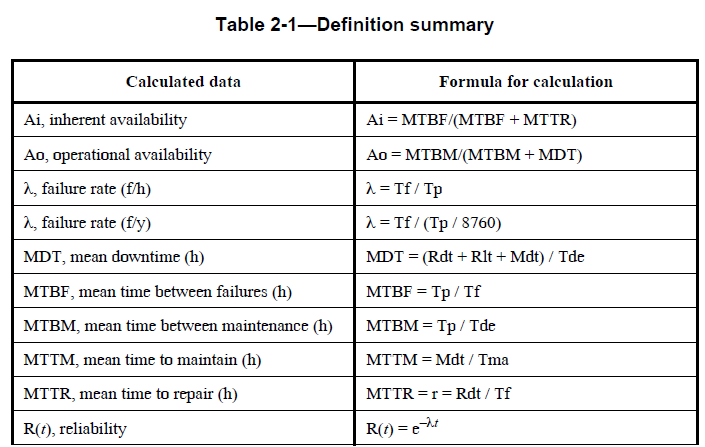

Matemáticamente, formalizamos el espacio de situaciones posibles como un conjunto, $\Omega$, que llamamos el *espacio muestral*. Un *evento* no es más que un subconjunto, $E \subseteq \Omega$.

Veamos esto con el ejemplo de la tirada de un dado. En este caso los posibles estados del "mundo", que para nosotros queda recortado al símbolo en la cara superior del dado, es $\Omega = \{1, 2, 3, 4, 5, 6\}$.

Un ejemplo de evento muy simple es "salió un seis". Matemáticamente, este es el evento $E = \{6\}$. Pero también podemos considerar el evento "el número que salió es impar". Esto corresponde al subconjunto $V = \{1, 3, 5\}$.

## Axiomas de una medida de probabilidad

Es importante saber que las medidas de probabilidad tienen ciertos axiomas que definen de una forma muy, muy precisa qué es la probabilidad. A veces esos axiomas van a sernos útiles y otras veces van a quedar como un detalle de bajo nivel. En el caso de un espacio muestral *discreto* como el del dado, estos axiomas son los siguientes (el caso continuo es importante pero matemáticamente un poco más involucrado, y lo mencionaremos más adelante).

**Definición.** Una *medida de probabilidad* (discreta) es una función $p$ que le asigna a cada evento posible $E$ un número positivo $p(E) > 0$, de forma tal que
1. si $E$ y $V$ son eventos disjuntos (como en el ejemplo de recién), $p(E \cup V) = p(E) + p(V)$.
2. $p(\Omega) = 1$

El primer ítem dice que si dos eventos son *incompatibles* (nunca pueden ocurrir a la vez), la probabilidad del evento combinado "pasó $E$ o pasó $V$") es la suma de las probabilidades individuales. En el caso en que $\Omega$ es infinito (pero discreto, en general es el caso $\Omega = \mathbb{N}$, los números naturales), la propiedad se extiende a colecciones infinitas de subconjuntos: si $(E_i)_{i = 1,\dots}$ son infinitos subconjuntos de $\Omega$, todos disjuntos uno a otro (o sea, son eventos incompatibles), $p(\bigcup_{i=1}^{\infty} E_i) = \sum_{i=1}^{\infty} p(E_i)$.

El segundo ítem dice que las probabilidades suman a uno: siempre alguna de todas las posibilidades tiene que haber ocurrido, y ningún evento puede tener probabilidad mayor a $1$.

Puede demostrarse a partir del primer axioma que si $E$ y $V$ no son disjuntos, en general vale la regla


$$ p(E \cup V) = p(E) + p(V) - p(E \cap V)$$

que resulta bastante útil para hacer cuentas.

### Volviendo al ejemplo

En este caso, partimos de la base de que todos los números ocurren con igual frecuencia. Es importante notar que esta es una hipótesis fáctica sobre el estado material del dado (que es simétrico y no está cargado) y sobre el proceso físico de tirado del dado (por ejemplo, asumimos que quien tira el dado no tiene un control sobrehumano sobre sus músculos que le permite asegurarse de que cierta cara del dado quedará boca arriba).

Una vez hecha esta hipótesis, nuestro modelo dice que el número $i$ sale $f_i = 1/6$ de las veces. Los números $f_i$, que son las frecuencias relativas de cada resultado, determinan la medida de probabilidad $p$, pero $p$ le asigna una probabilidad no solo a los eventos $\{1\}, \{2\}, \dots \{6\}$, sino que le asigna una probabilidad a cada subconjunto de $\Omega = \{1, 2, 3, 4, 5, 6\}$. Lo que ocurre es que todas las demás probabilidades pueden calcularse utilizando el axioma de la suma de probabilidades.

Por ejemplo: *¿Cuál es la probabilidad de sacar un número par **o** un número que sea múltiplo de 3?*

* $\Omega = \{1, 2, 3, 4, 5, 6\}$, $A = \text{par}$, $B = \text{multiplo de 3}$
* $ P(A) = \frac{3}{6} = 0.5$
* $ P(B) = \frac{2}{6} = \frac{1}{3}$
* $ P(A \cap B) = \frac{1}{6}$, ya que $ A \cap B = \{6\}$
* $\implies P(A \cup B) = \frac{3}{6} + \frac{2}{6} - \frac{1}{6} = \frac{4}{6} = \frac{2}{3} $

 

 

## **Regla de la suma de probabilidades**

---



$$ p(E \cup V) = p(E) + p(V) - p(E \cap V)$$


---

Donde:

 $p(E \cup V) $ es la probabilidad que ocurra el evento E **o** V, o que ocurran ambos 

 $p(E \cap  V) $ es la probabilidad que ocurran los eventos E **y** V

 
<a id='section3'></a>
# 3. Probabilidad condicional


Hasta ahora pudimos formalizar situaciones del mundo real en las cuales distintos eventos de interés no *dependen* unos de otros. Por ejemplo, al tirar dos dados, *conocer* el valor que adopta uno de los dos no cambia nuestras predicciones sobre el valor del otro. Son fenómenos descorrelacionados, o más precisamente hablando, son variables aleatorias independientes.

Pero es muy fácil comenzar a hacernos preguntas que exceden las herramientas que desarrollamos hasta ahora. Por ejemplo, supongamos que tiro dos dados A y B ($X_A, X_B \sim U(1,\dots,6)$) y escondo el resultado, pero les digo que la suma ($Y = X_A + X_B$) de los dos números es $8$. 

¿Cuál debería ser su predicción sobre la probabilidad de que para el dado A haya salido un $2$? 

¿Y si les digo que la suma dio $9$? 

Algo es seguro: la predicción tiene que cambiar de alguna manera según la información suministrada, ya que si la suma es $9$, es absolutamente imposible que el dado A sea un $2$ (habría que sumarle $7$), mientras que si es $8$ sí hay alguna posibilidad, pero quizá menor que si la suma fuera $7$.

Para responder estas preguntas debemos introducir la noción de **probabilidad condicional**, tanto para eventos como para variables aleatorias.

**Definición.** Sea $\Omega$ un espacio muestral, $p$ una medida de probabilidad sobre $\Omega$, y sea $E \subseteq \Omega$ un evento con probabilidad no nula ($p(E) \neq 0$). La *probabilidad condicional dado $E$* es una nueva medida de probabilidad $p(-|E)$ definida según

$$ p(V|E) = \frac{p(E \cap V)}{p(E)}. $$

Noten que hay que pedir que $p(E) \neq 0$ para que esta fórmula tenga sentido.

Veamos por qué tiene sentido esta fórmula con el ejemplo de los dados. La idea es esta: dado que pasó $E$ (la suma de los dados es $8$), quiero saber la probabilidad de $V$ (el dado A es un $2$). Para eso, tengo que mirar todas las situaciones posibles (todos los $\omega \in \Omega$) en las que haya pasado $E$. En nuestro caso, esas situaciones son $(2, 6), (3, 5), (4, 4), (5, 3)$ y $(6, 2)$. Ahora, *de esas* situaciones, miro aquellas en las que *además* pasó $V$. Esto corresponde a tomar la intersección $E \cap V$. En nuestro caso, hay una única situación y es $\omega = (2, 6)$. Ahora tenemos que preguntarnos por la probabilidad de $E \cap V = \{(2, 6)\}$, pero no sobre todas las situaciones posibles del mundo, sino solo sobre las situaciones en las que ocurrió $E$. Esto es una regla de tres simple: si ahora la probabilidad de $E$ la tomamos, temporariamente, como igual a $1$, cuál es la probabilidad correspondiente para $E \cap V$?

\begin{align}
p(E)& \quad \underline{\hspace{3cm}}&1 \\
p(E \cap V)& \quad \underline{\hspace{3cm}}&?
\end{align}

Pues claro, la respuesta es $\frac{p(E \cap V)}{p(E)}$ que es la fórmula de arriba.

En nuestro caso, como la probabilidad de cada $\omega$ es la misma, la probabilidad de cada evento $W$ es igual al número de elementos de $W$, que llamamos $\# W$, dividido por el tamaño del espacio muestral, $N$. Entonces podemos calcular el resultado así:

$$p(V|E) = \frac{p(E \cap V)}{p(E)} = \frac{\#(E \cap V) / N}{\# E / N} = \frac{\#(E \cap V)}{\# E}$$

Es decir, simplemente contamos qué fracción de las veces que pasó $E$, también ocurrió $V$. O sea que la probabilidad condicional de que haya salido un $2$ en el dado A dado que la suma de los dos dados es $8$, es igual a $1/5$.

## Independencia

En este ejemplo de los dados, $p(V) \neq p(V | E)$. Esto nos dice que los eventos no son independientes, pues saber que uno ocurrió cambia la probabilidad de que el otro haya ocurrido. Decimos que dos eventos $A$ y $B$ son *independientes* si $P(A|B) = P(A)$. En ese caso ocurre también que $p(B|A) = p(B)$ y que

$$p(A \cap B) = p(A) p(B).$$

Decimos que la probabilidad se *factoriza* como el producto de las probabilidades. Si $A$ y $B$ no fueran independientes, en general tenemos la factorización

$$p(A \cap B) = p(A|B) p(B)$$

que no es más que reordenar la definición. Esta fórmula es muy útil: a veces lo que queremos saber es $p(A \cap B)$, la probabilidad de que hayan ocurrido $A$ y $B$ al mismo tiempo, y lo que sabemos es la probabilidad de que ocurra $B$, y la probabilidad de que ocurra $A$ dado que ocurrió $B$.

Ejemplo, calcular la probabilidad que en el lanzamiento de un dado, sea el suceso A= que salga un 5 ,  si además se sabe que el suceso B (que salga un nº impar) 

# Ejercicios:



*   En un centro escolar los alumnos pueden optar por cursar como lengua extranjera inglés o francés. En un determinado curso, el 90 \% de los alumnos estudia inglés y el resto francés. El 30 \%
de los que estudian inglés son chicos y de los que estudian francés son chicos el 40 \%. Eligiendo un alumno al azar, ¿cuál es la probabilidad de que sea chica?

* Una clase consta de 6 niñas y 10 niños. Si se escoge un comité de tres al azar, hallar la probabilidad de: (a) Seleccionar tres niños, (b) Seleccionar exactamente dos niños y una niña, (c)  Seleccionar por lo menos un niño, (d) Seleccionar exactamente dos niñas y un niño.

 
*   De una baraja de 48 cartas se extrae simultáneamente dos de ellas. Calcular la probabilidad de que:(a)  Las dos sean copas, (b) Al menos una sea copas.







## **Regla de la multiplicación de probabilidades**

Si la probabilidad de ocurrencia de un evento E es afectado por la ocurrencia de un evento V, entonces E y V son eventos no independientes.

La probabilidad condicional del evento V, dado que el evento E ya ocurrió, es denotada por: $p (V/E)$


---



$$ p(V \cap E) = p (V/E) p(E) $$


$$ p (V/E)  =  \frac{p(V\cap E)}{p(E)}   $$

Si los eventos son independientes, es decir, que la ocurrencia de E no afecta la ocurrencia de V


$$ p(V \cap E) = p (V) p(E) $$

---

Donde:


 $p(E \cap  V) $ es la probabilidad que ocurran los eventos E **y** V

## **Complementación**

 
---

$$ p(E') = 1 -  p(E) $$

---



## El Teorema de Bayes

Enunciar el teorema no es más que reordenar algunas ecuaciones que ya conocemos.

Por definición, $p(A|B) = p(A \cap B) / p(B)$. Reordenando como antes, tenemos $p(A \cap B) = p(A|B) p(B)$. Pero de la misma forma, porque $A \cap B = B \cap A$, podemos obtener

$$p(A \cap B) = p(B|A) p(B)$$

Igualando los términos del lado derecho y reordenando, obtenemos la fórmula conocida como **Teorema de Bayes**:

$$p(B|A) = \frac{p(A|B) p(B)}{p(A)}$$

Fíjense que la fórmula nos permite invertir los roles de $A$ y $B$. $p(A|B)$ y $p(B|A)$ no son lo mismo numéricamente, y conceptualmente representan cosas totalmente diferentes.

# El caso continuo y la distribución normal

Llamamos "caso continuo" al caso en que nuestro espacio muestral contiene números reales. Por ejemplo puede ser $\Omega = [0, +\infty)$, todos los reales positivos. Este sería el caso si por ejemplo queremos modelizar los posibles tiempos de espera entre dos sucesos.

Para simplificar las cosas vamos a pensar siempre en el caso $\Omega = \mathbb{R}$, todos los números reales, que es el más importante.

En el caso continuo, hay una serie de dificultades técnicas que lamentablemente no son fáciles de explicar. Por ejemplo, ya no es cierto que cualquier subconjunto $E \subseteq \Omega$ constituye un evento válido. Esto se debe a que hay subconjuntos de $\mathbb{R}$ que son muy raros y contraintuitivos, que no tienen un "tamaño" bien definido. Pero mientras que nuestros subconjuntos de $\mathbb{R}$ sean cosas construidas como uniones e intersecciones de intervalos $(a, b)$ no vamos a tener problemas.

Si bien hay detalles técnicos (como el que acabamos de mencionar) que no nos afectan en la práctica cotidiana del análisis de datos y la estadística, sí hay diferencias importantes a tener en cuenta, y esas diferencias está en cómo se definen las distribuciones de probabilidad y cómo se manipulan.

En el caso discreto, habíamos dicho que una distribución de probabilidad era lo que a veces se llama una *point mass function* o PMF: a cada valor posible le asigna su probabilidad. Esto tenía todo el sentido del mundo porque a partir de esta información podíamos luego recuperar la probabilidad de cualquier evento posible, sumando las probabilidades de los valores que correspondieran. Ahora, en vez de eso, vamos a definir las distribuciones de probabilidad como PDF o *densidades de probabilidad*.

La matemática de las probabilidades continuas es un poco más complicada y va a requerir que reemplacemos las sumas por integrales. Por ejemplo, en vez de pedir la condición de normalización $ \sum_{x \in S} f(x) = 1$ para una PMF $f$, si ahora $f$ es una densidad, tendremos que pedir

$$ \int_{-\infty}^{\infty} f(x) dx = 1 $$

que es la condición análoga, pero donde ahora tenemos que sumar sobre una cantidad infinita no numerable de valores posibles para $x$, que es lo mismo que decir "integrar".

Vayamos introduciendo a la estrella de la noche, la distribución continua más importante de todas: la **distribución normal** (o gaussiana), que depende de dos parámetros $\mu$ y $\sigma$ y llamamos $\mathcal{N}(\mu, \sigma)$.

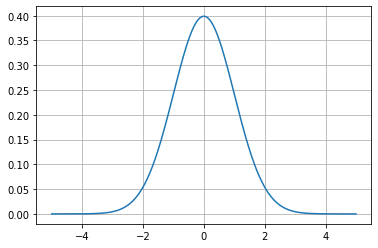

In [3]:
mu = 0
sigma = 1
normal = st.norm(loc=mu, scale=sigma)
# Grafiquemos esta distribución cerca del 0
xs = np.linspace(-5, 5, 1000)
ys = normal.pdf(xs)
fig, ax = plt.subplots(facecolor=(1, 1, 1))
ax.plot(xs, ys)
ax.grid(True)

Sea $X \sim \mathcal{N}(\mu, \sigma)$ nuestra v.a. normal. La función $f$ es una "densidad" porque **ya no es cierto que $f(x)$ sea la probabilidad del evento $X = x$**. De hecho, va a pasar que $\text{Pr}(X = x) = 0$, porque como son tantos valores posibles para $X$, la probabilidad de cada uno de ellos es infinitesimalmente pequeña (esta es una forma de pensarlo, si no les convence simplemente sigan de largo). En cambio lo que sí es cierto (y podemos tomar casi como la definición de una densidad de probabilidad) es que 

$$ \text{Pr}(a \leq X \leq b) = \int_a^b f(x) dx. $$

En palabras: si quiero saber la probabilidad de que $X$ caiga en el intervalo $(a, b)$, me fijo cuánto vale la integral de $f$ entre $a$ y $b$, o lo que es lo mismo, el área bajo la curva entre $a$ y $b$:

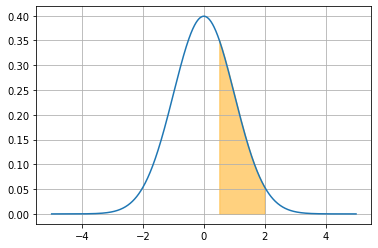

In [4]:
a = 0.5
b = 2
ax.fill_between(xs, ys, where=(a <= xs)&(xs <= b), color='orange', alpha=0.5)
fig

Si queremos pedirle a Python que nos haga la cuenta, usamos el método `cdf` ("Cumulative Distribution Function") del objeto que representa a la distribución. `normal.cdf(t)` nos da la probabilidad acumulada hasta el valor `t`, o sea, el área bajo la curva que queda a la izquierda de `xt`, o matemáticamente, $\int_{- \infty}^t f(x) dx$. Se sigue entonces que podemos calcular $\int_a^b f(x) dx$ como $\int_{- \infty}^b f(x) dx - \int_{- \infty}^a f(x) dx$, o lo que es lo mismo, `normal.cdf(b) - normal.cdf(a)`.

Supongamos que X está distribuida según una normal con mu=0 y sigma=1.      
 Entonces la probabilidad de que X esté entre a=0.5 y b=2 es 0.29


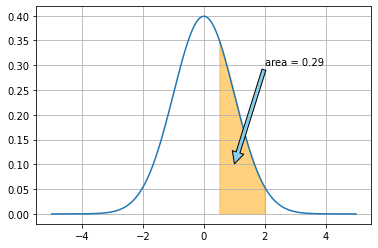

In [5]:
prob = normal.cdf(b) - normal.cdf(a)
# Agreguemos esta info a nuestro gráfico de antes
ax.annotate('area = {0:.2g}'.format(prob), xy =(1, 0.1),
                xytext =(2, 0.3),
                arrowprops = dict(facecolor ='skyblue',
                                  shrink = 0.005))
print("Supongamos que X está distribuida según una normal con mu={} y sigma={}.\
      \n Entonces la probabilidad de que X esté entre a={} y b={} es {:.2g}".format(mu, sigma, a, b, prob))
fig

El parámetro $\mu$ controla donde está centrada la distribución, mientras que $\sigma$ controla qué tan ancha es la campana (pueden modificar estos valores en el código de arriba y graficar cómo se ve el resultado).

**Ejercicio de lectura activa (5)**: Si $f$ es la distribución normal con $\mu = 0$ y $\sigma = 0.01$, ¿Cuál es el valor de $f(0)$? ¿Hay algo raro en esto? ¿Por qué no es un problema?

<details>
<summary>Pueden ver la respuesta haciendo click acá.</summary>

Ejecutando `st.norm(loc=0, scale=0.01).pdf(0)` obtenemos `39.89422804014327`. Podría hacerles ruido porque es un número mayor a $1$. Pero eso no es un problema, porque $f(x)$ no es la probabilidad de que $X=x$. Lo que está pasando es que, como $\sigma$ es bastante chico, toda la campana se hace angosta y entonces para que el área siga siendo $1$, tiene que hacerse más alta. Si $\sigma$ es más chico, la probabilidad se concentra más alrededor de $\mu$.

</details>

Podemos interpretar $f(x)$ como indicando qué tanto más probable es que $X$ esté cerca de $x$ que de algún otro valor. Es decir, si $f(x_1)$ es más grande que $f(x_2)$, eso nos está diciendo que es *más* probable que $X$ esté cerca de $x_1$ que de $x_2$.